# Business Understanding

## Project Domain

## Problem Statements

## Goals

## Solution Statements

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramdhan19","key":"39aca3439f885fec3de94e90de7e3a63"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d mrsimple07/clothes-price-prediction

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/clothes-price-prediction
License(s): apache-2.0


In [4]:
!mkdir clothes-price-prediction
!unzip clothes-price-prediction.zip -d clothes-price-prediction
!ls clothes-price-prediction

Archive:  clothes-price-prediction.zip
  inflating: clothes-price-prediction/clothes_price_prediction_data.csv  
clothes_price_prediction_data.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('/content/clothes-price-prediction/clothes_price_prediction_data.csv')

In [7]:
df.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


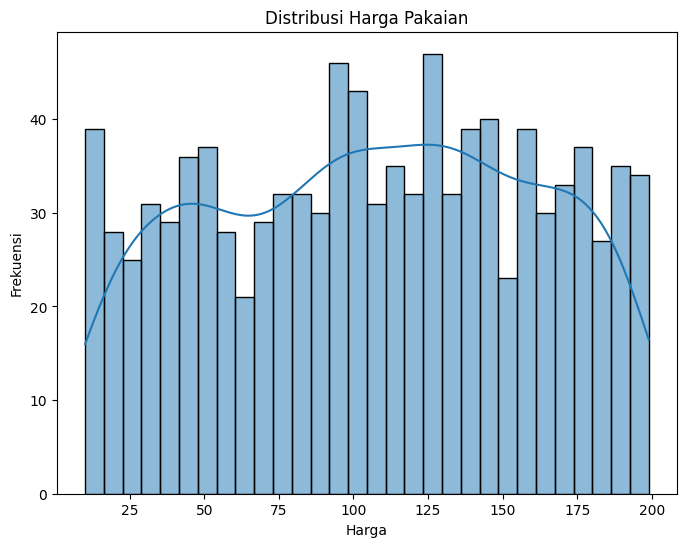

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Pakaian')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

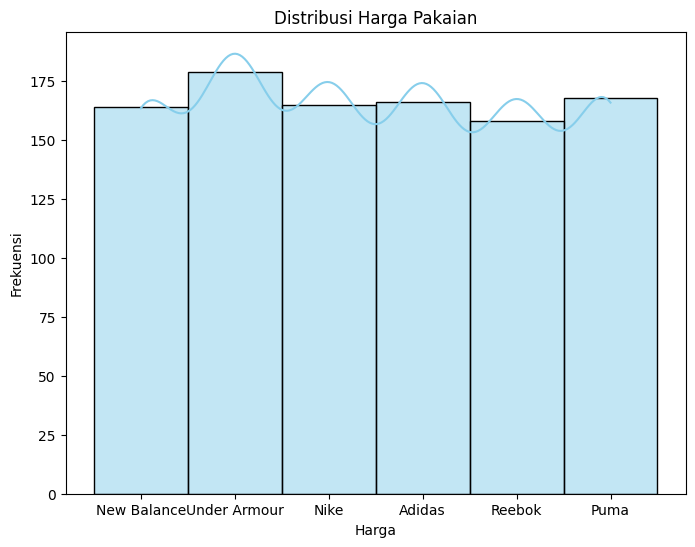

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Brand'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Pakaian')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()


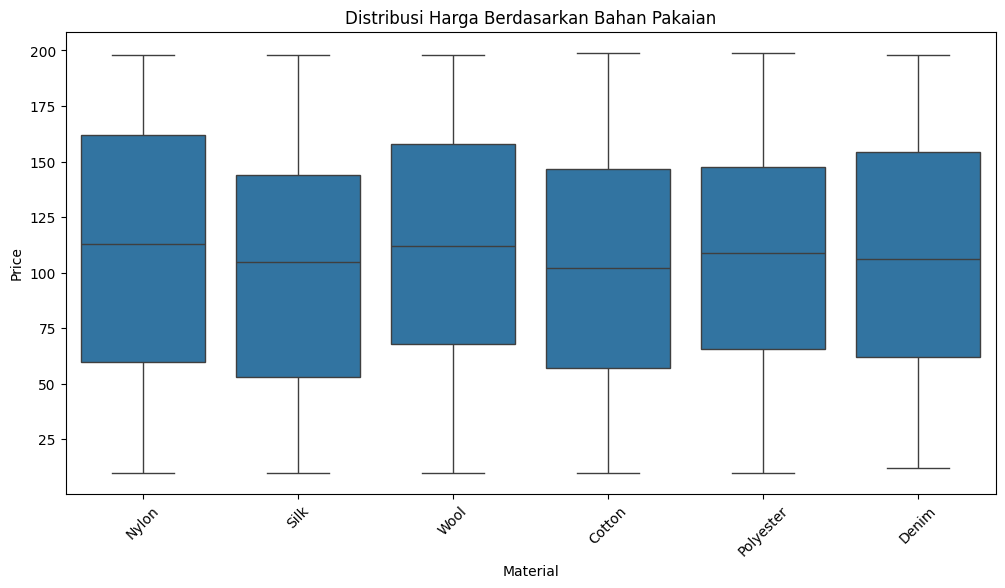

In [10]:
# Misalnya, jika ada kolom 'material' yang menunjukkan bahan pakaian
plt.figure(figsize=(12, 6))
sns.boxplot(x='Material', y='Price', data=df)
plt.title('Distribusi Harga Berdasarkan Bahan Pakaian')
plt.xticks(rotation=45)
plt.show()


<ipython-input-11-5ab3bbfcdd31>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Price', data=df, estimator='mean', ci=None, palette='muted')
<ipython-input-11-5ab3bbfcdd31>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Price', data=df, estimator='mean', ci=None, palette='muted')


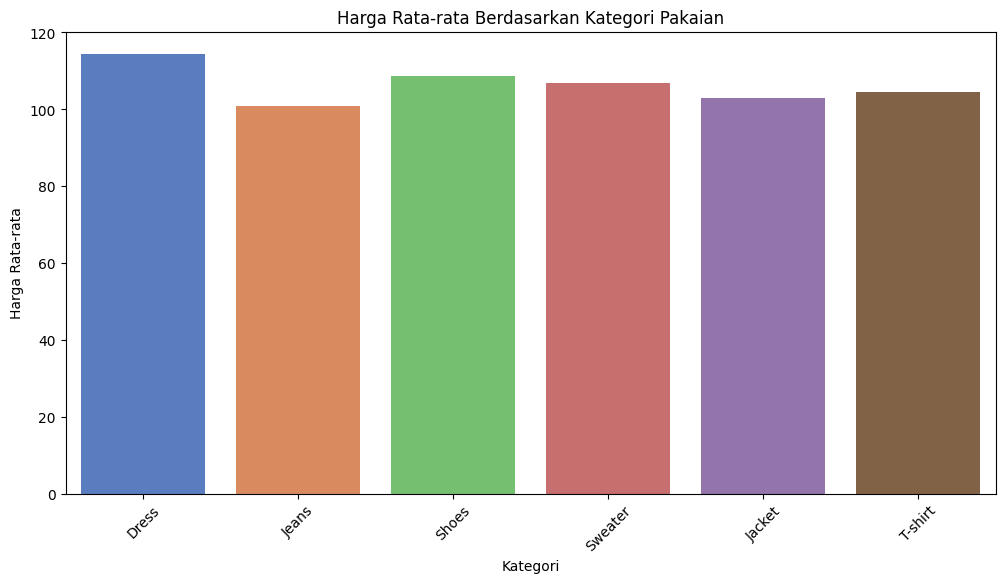

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Price', data=df, estimator='mean', ci=None, palette='muted')
plt.title('Harga Rata-rata Berdasarkan Kategori Pakaian')
plt.xlabel('Kategori')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=45)
plt.show()


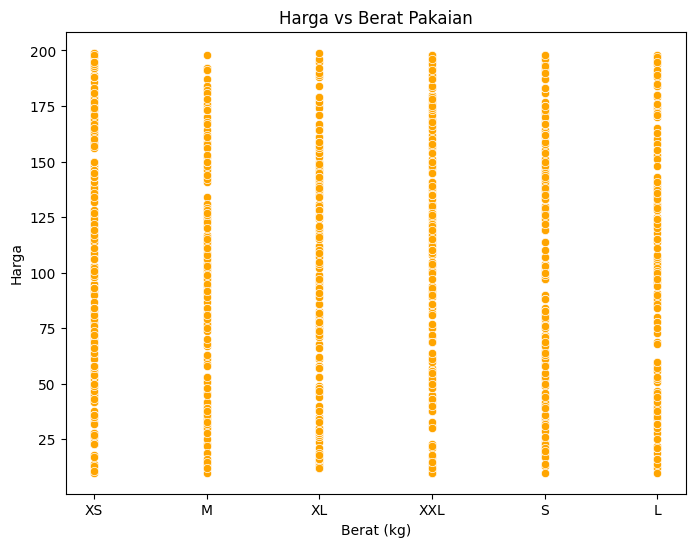

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Size', y='Price', data=df, color='orange')
plt.title('Harga vs Berat Pakaian')
plt.xlabel('Berat (kg)')
plt.ylabel('Harga')
plt.show()


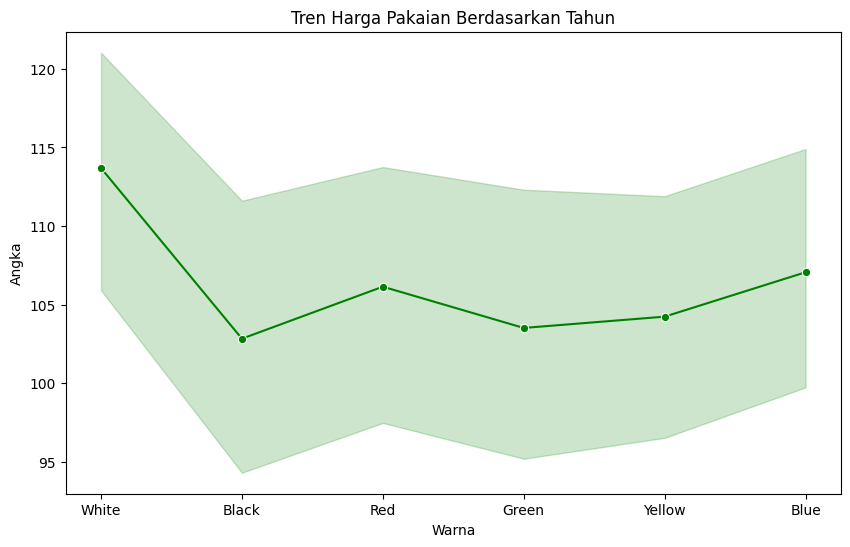

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Color', y='Price', data=df, marker='o', color='green')
plt.title('Tren Harga Pakaian Berdasarkan Tahun')
plt.xlabel('Warna')
plt.ylabel('Angka')
plt.show()


In [14]:
# Menampilkan informasi umum tentang dataset
print(df.info())

# Menampilkan statistik deskriptif untuk kolom numerik
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None
             Price
count  1000.000000
mean    106.289000
std      53.695444
min      10.000000
25%      59.750000
50%     108.000000
75%     150.000000
max     199.000000


# Data Preparation

In [78]:
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class

le_Brand = LabelEncoder()
le_Category = LabelEncoder()
le_Color = LabelEncoder()
le_Material = LabelEncoder()
le_Size = LabelEncoder()

In [79]:
df['Brand'] = le_Brand.fit_transform(df['Brand'])
df['Category'] = le_Category.fit_transform(df['Category'])
df['Color'] = le_Color.fit_transform(df['Color'])
df['Material'] = le_Material.fit_transform(df['Material'])
df['Size'] = le_Size.fit_transform(df['Size'])

In [80]:
x = df.drop ("Price", axis=1)
y = df["Price"]

In [81]:
df.head()

,Brand,Category,Color,Size,Material,Price
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113


In [82]:
x_train = pd.get_dummies(x_train, columns=x_train.select_dtypes(include=['object']).columns)
x_test = pd.get_dummies(x_test, columns=x_test.select_dtypes(include=['object']).columns)

missing_cols_train = set(x_test.columns) - set(x_train.columns)
missing_cols_test = set(x_train.columns) - set(x_test.columns)

for col in missing_cols_train:
    x_train[col] = 0

for col in missing_cols_test:
    x_test[col] = 0

x_train = x_train[x_test.columns]

# Modeling

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 13895.7432 - mae: 105.6419 - val_loss: 13213.3281 - val_mae: 100.1033
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13943.5625 - mae: 105.7784 - val_loss: 12417.6094 - val_mae: 96.0907
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12718.3623 - mae: 99.5700 - val_loss: 10723.7949 - val_mae: 87.3142
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10769.7324 - mae: 89.8942 - val_loss: 7915.5991 - val_mae: 72.6394
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7506.6362 - mae: 73.5690 - val_loss: 4843.2070 - val_mae: 56.9419
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4399.5264 - mae: 55.5288 - val_loss: 3453.6633 - val_mae: 50.1206
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3386.1621 - mae: 49.1857 - val_loss: 3459.3262 - val_mae: 49.9662
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3173.1697 - mae: 46.1443 - val_loss: 3423.3921 - val_mae: 49.8482
Epoch

Mean Absolute Error on test set: 47.01344299316406
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


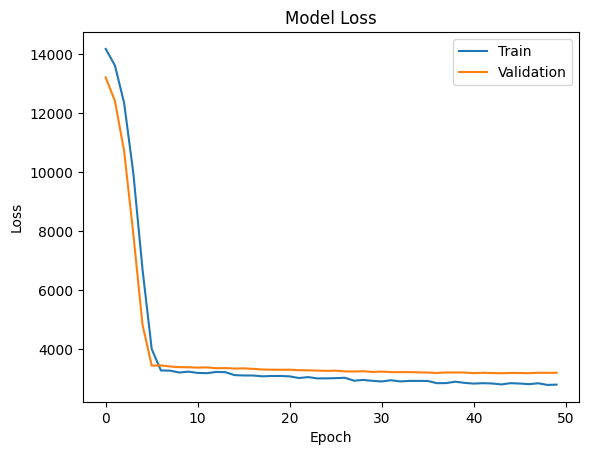

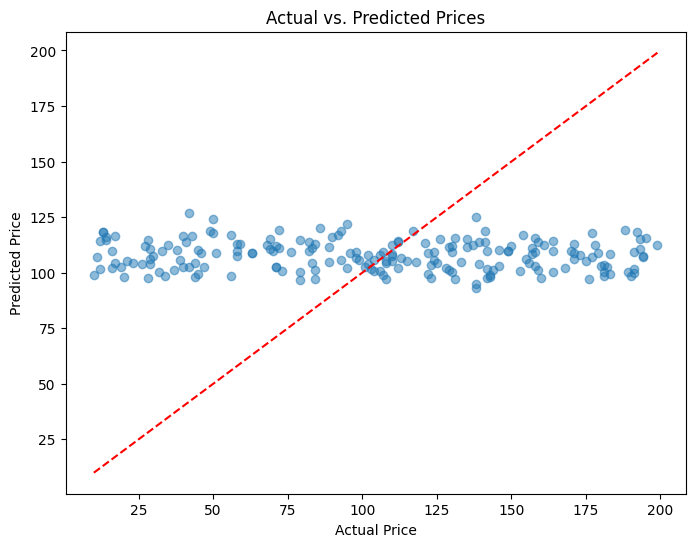

In [87]:
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Mean Absolute Error on test set: {mae}")

y_pred = model.predict(x_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()


# Evaluation

In [90]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

target_mape = 20
if mape < target_mape:
  print("Model meets accuracy target.")
else:
  print("Model does not meet accuracy target. Consider improving the model.")


model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2) # Increased epochs and batch_size

# Evaluate again
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Mean Absolute Error on test set (Improved Model): {mae}")

y_pred = model.predict(x_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE, Improved Model): {mape:.2f}%")

if mape < target_mape:
  print("Improved Model meets accuracy target.")
else:
  print("Improved Model still does not meet accuracy target. Further adjustments are needed.")


Mean Absolute Percentage Error (MAPE): 103.05%
Model does not meet accuracy target. Consider improving the model.
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 14249.3906 - mae: 107.1076 - val_loss: 13365.1621 - val_mae: 100.8346
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14069.0547 - mae: 105.2473 - val_loss: 12637.1699 - val_mae: 97.1724
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12854.1982 - mae: 100.7810 - val_loss: 10807.4629 - val_mae: 87.6639
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10757.9023 - mae: 89.2939 - val_loss: 7160.6782 - val_mae: 68.4943
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6397.0820 - mae: 65.4516 - val_loss: 3586.2761 - val_mae: 51.1252
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3240.2009 - mae: 47.1676 - val_loss: 4125.7173 - val_mae: 53.0578
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3629.2812 - mae: 49.6923 - val_loss: 3462.1587 - val_mae: 50.1193
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3187.2051 - mae: 47.5431 - val_loss: 3478.8169 - val_mae: 5

# Deployment

## Model Simulation

In [101]:
import pandas as pd

def simulate_price(model, scaler, features):
    """
    Simulates the price prediction based on input features.

    Args:
        model: The trained Keras model.
        scaler: The MinMaxScaler used for feature scaling.
        features: A dictionary of input features. The keys must match
                 the column names in your original dataframe, *excluding* 'Price'.

    Returns:
        The predicted price.
    """

    input_df = pd.DataFrame([features], columns=x.columns)

    for col in ['Brand', 'Category', 'Color', 'Material', 'Size']:
        if features[col] in le_Brand.classes_ if col == 'Brand' else \
           features[col] in le_Category.classes_ if col == 'Category' else \
           features[col] in le_Color.classes_ if col == 'Color' else \
           features[col] in le_Material.classes_ if col == 'Material' else \
           features[col] in le_Size.classes_:
            input_df[col] = le_Brand.transform(input_df[[col]])[0] if col == 'Brand' else \
                            le_Category.transform(input_df[[col]])[0] if col == 'Category' else \
                            le_Color.transform(input_df[[col]])[0] if col == 'Color' else \
                            le_Material.transform(input_df[[col]])[0] if col == 'Material' else \
                            le_Size.transform(input_df[[col]])[0]
        else:
            # Handle unseen values (e.g., assign a default value or raise an error)
            # For example, assign a default encoded value of 0
            input_df[col] = 0  # Or raise a more informative error


    # Scale the input features using the same scaler
    scaled_features = scaler.transform(input_df)

    # Make the prediction
    predicted_price = model.predict(scaled_features)[0][0]

    return predicted_price


# Example usage:
#  - Replace with actual feature values
example_features = {
    'Brand': 'Zara',
    'Category': 'Dress',
    'Color': 'Black',
    'Material': 'Cotton',
    'Size': 'S'
     # Add any other features from your dataset
}

predicted_price = simulate_price(model, scaler, example_features)
print(f"Predicted Price for the given features: ${predicted_price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Price for the given features: $107.65


In [91]:
df.head(10)

,Brand,Category,Color,Size,Material,Price
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113
5,4,1,3,3,2,19
6,3,1,3,5,3,31
7,0,0,3,4,1,46
8,4,0,0,2,5,97
9,0,2,5,0,5,80


## Save Model

In [104]:
# Save the model
model.save('price_prediction_model.h5')

# Download the model file
from google.colab import files
files.download('price_prediction_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>